In [1]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt,seaborn as sns

In [2]:
df=pd.read_csv('Flight_Booking.csv')
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


# Data Inspection

In [3]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [4]:
df=df.drop(columns=['Unnamed: 0'],axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [16]:
df['price'].unique()

array([ 5953,  5956,  5955, ..., 87051, 74731, 77105], dtype=int64)

In [17]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [18]:
df.duplicated().sum()

0

# Data Visualization

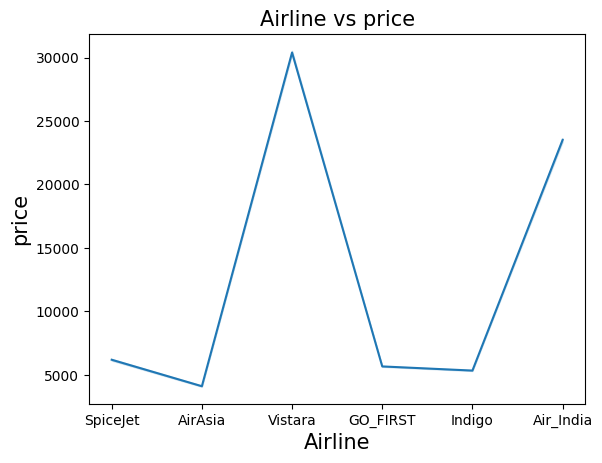

In [22]:
sns.lineplot(x='airline',y='price',data=df)
plt.title('Airline vs price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('price',fontsize=15)
plt.show()

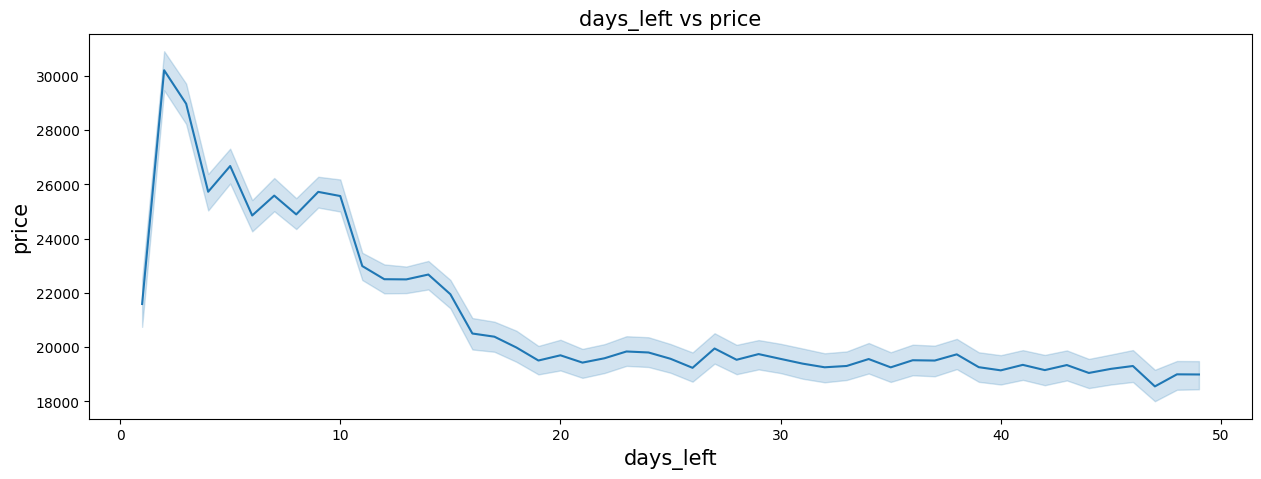

In [29]:
plt.figure(figsize=(15,5))
sns.lineplot(x='days_left',y='price',data=df)
plt.xlabel('days_left',fontsize=15)
plt.ylabel('price',fontsize=15)
plt.title('days_left vs price',fontsize=15)
plt.show()

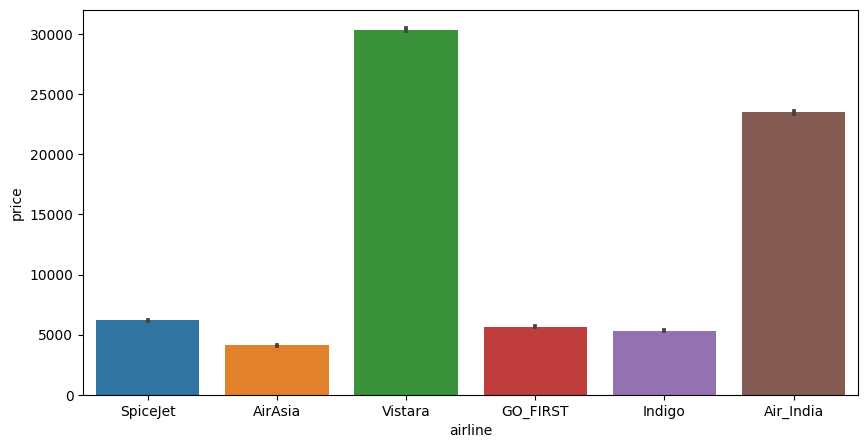

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(x='airline',y='price',data=df)
plt.show()

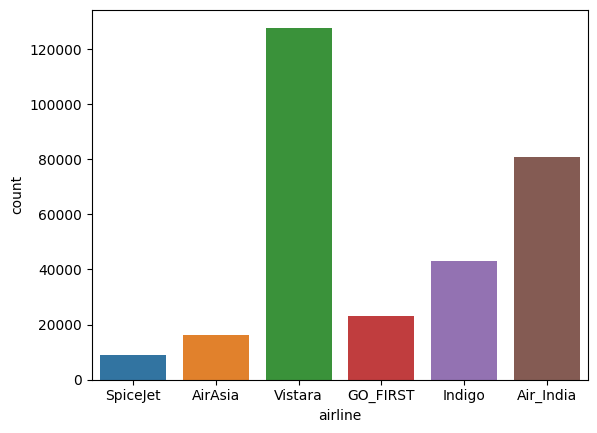

In [33]:
sns.countplot(data=df,x='airline')
plt.show()

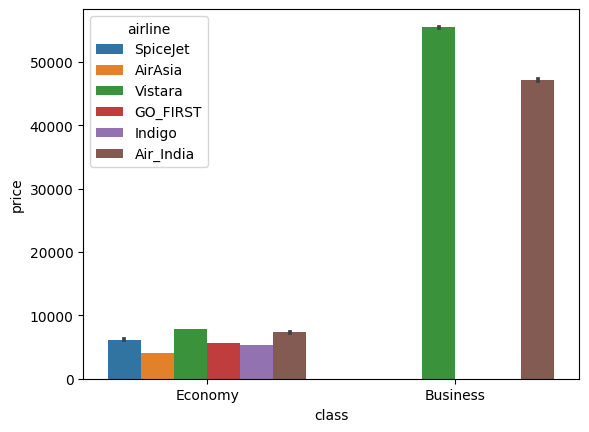

In [34]:
sns.barplot(x='class',y='price',data=df,hue='airline')
plt.show()

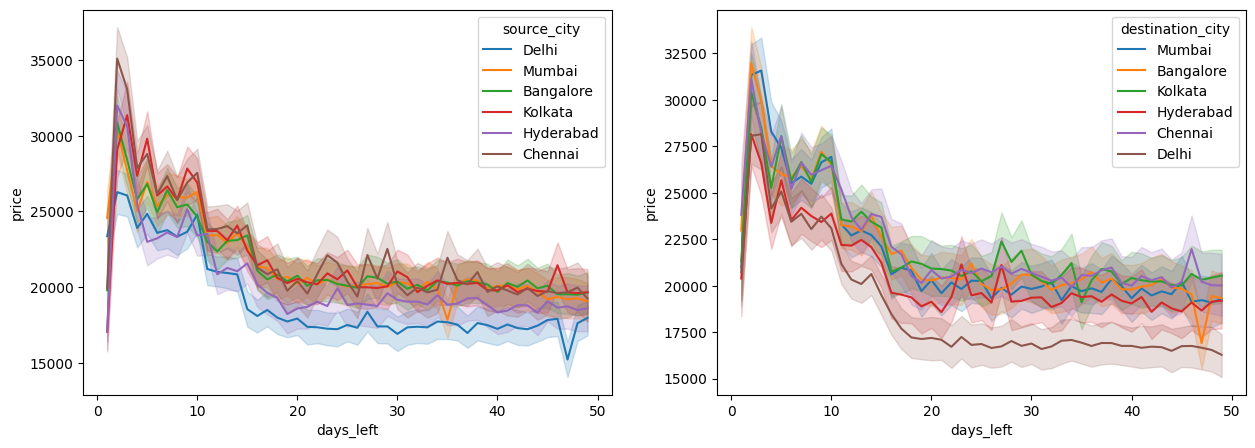

In [40]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.lineplot(x='days_left',y='price',hue='source_city',data=df,ax=ax[0])
sns.lineplot(x='days_left',y='price',hue='destination_city',data=df,ax=ax[1])
plt.show()

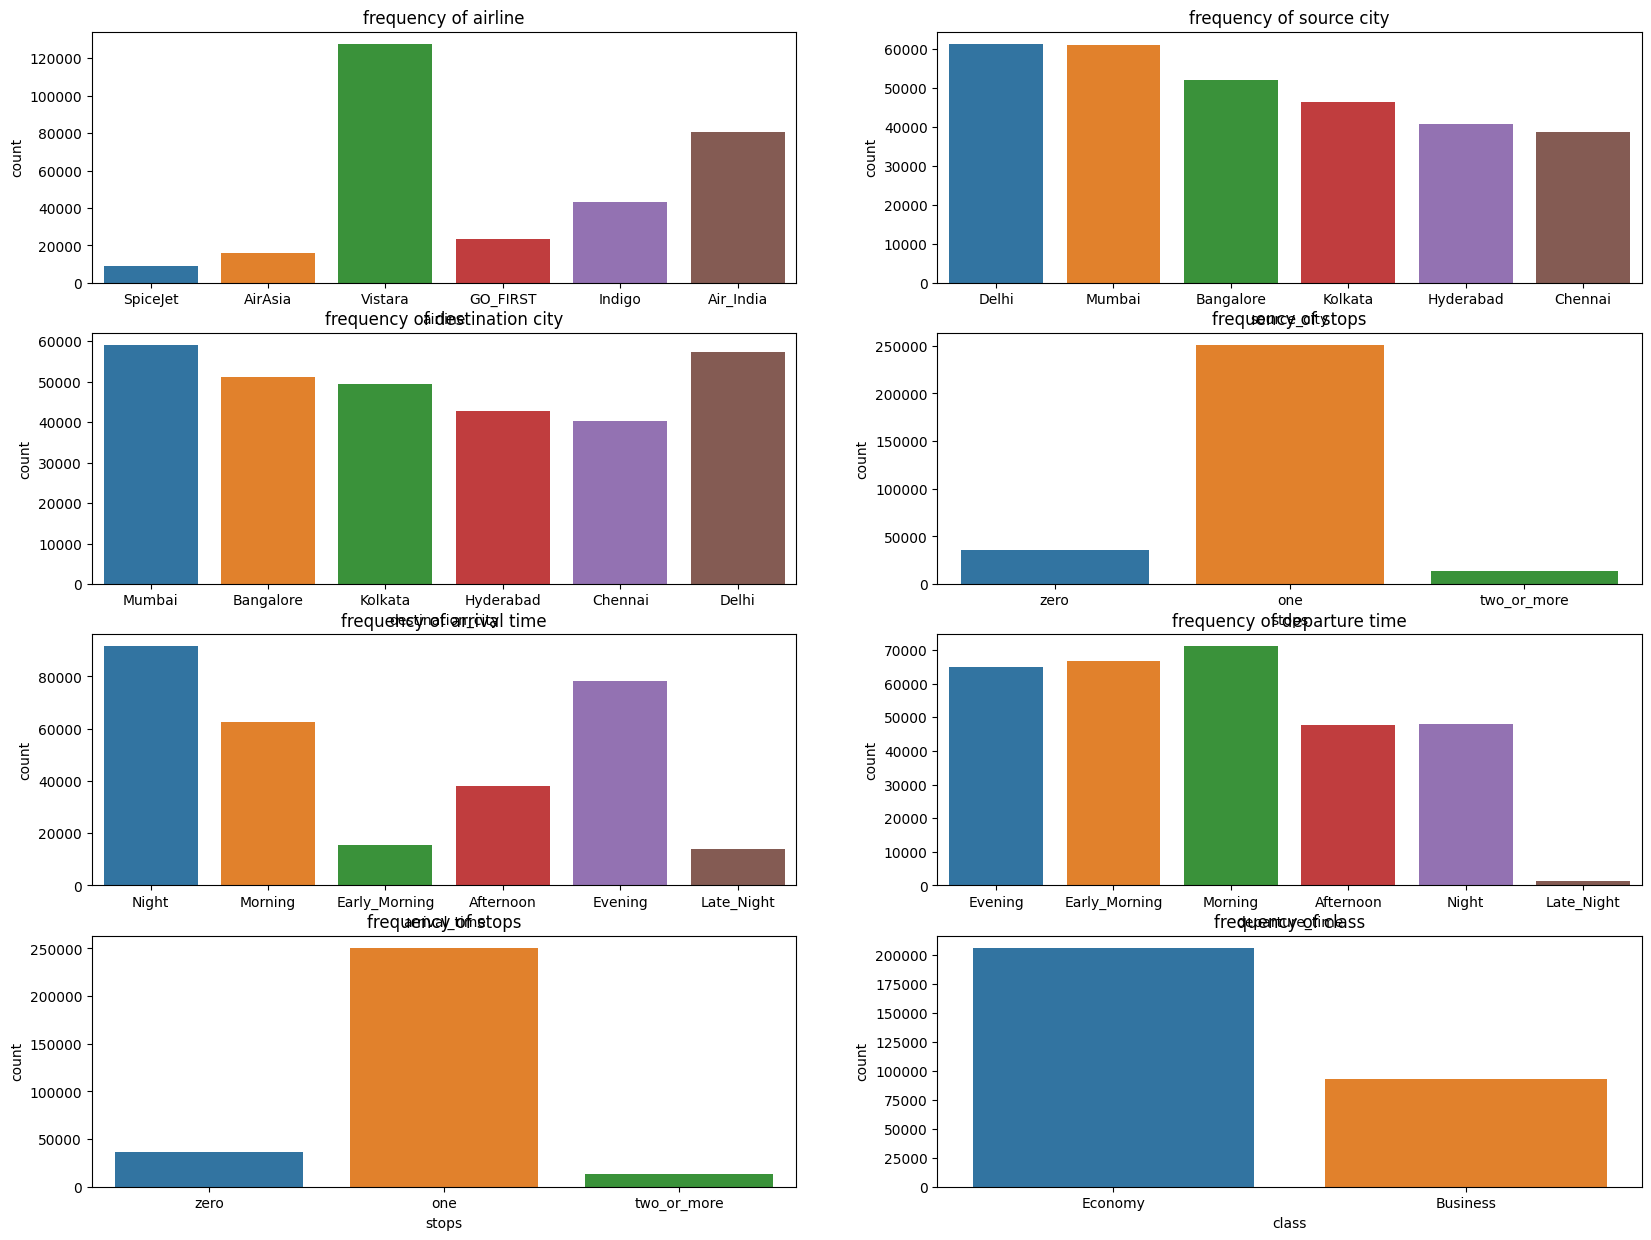

In [53]:
fig=plt.figure(figsize=(20,15))
plt.subplot(4,2,1)
sns.countplot(x=df['airline'],data=df)
plt.title('frequency of airline')
plt.subplot(4,2,2)
sns.countplot(x='source_city',data=df)
plt.title('frequency of source city')
plt.subplot(4,2,3)
sns.countplot(x='destination_city',data=df)
plt.title('frequency of destination city')
plt.subplot(4,2,4)
sns.countplot(x='stops',data=df)
plt.title('frequency of stops')
plt.subplot(4,2,5)
sns.countplot(x='arrival_time',data=df)
plt.title('frequency of arrival time')
plt.subplot(4,2,6)
sns.countplot(x='departure_time',data=df)
plt.title('frequency of departure time')
plt.subplot(4,2,7)
sns.countplot(x='stops',data=df)
plt.title('frequency of stops')
plt.subplot(4,2,8)
sns.countplot(x='class',data=df)
plt.title('frequency of class')
plt.show()

# Label Encoding

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
le=LabelEncoder()
for i in df.columns:
    if(df[i].dtypes=='object'):
        df[i]=le.fit_transform(df[i])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955


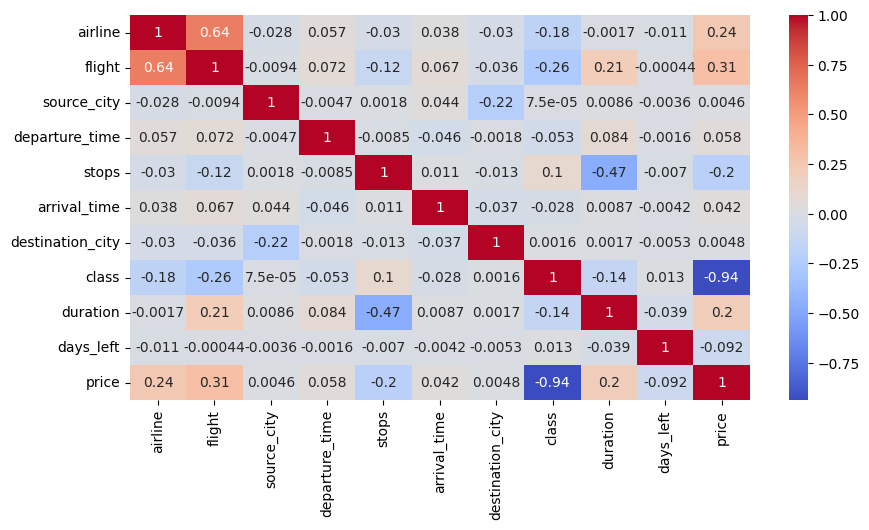

In [59]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

# Feature selection

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
cols=[]
for i in df.columns:
    if(i!='price'):
        cols.append(i)
x=df[cols]
vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF_Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,Features,VIF_Values
0,airline,3.393124
1,source_city,2.927766
2,departure_time,2.779427
3,stops,1.426614
4,arrival_time,3.684550
5,destination_city,2.885337
6,class,2.849370
7,duration,4.113876
8,days_left,3.976790


In [63]:
df=df.drop(columns=['flight'],axis=1)

In [66]:
y=df['price']


# Splitting data set 

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)


# Standardizing splitting data

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

#  Building Linear Model

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
model=LinearRegression()
model=model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [77]:
from sklearn.metrics import *

In [78]:
r2_score(y_test,y_pred)

0.9048439506983099

In [79]:
mean_squared_error(y_test,y_pred)

49083438.309051365

In [81]:
mean_absolute_error(y_test,y_pred)

4635.820468887935

In [83]:
np.sqrt(mean_squared_error(y_test,y_pred))

7005.957344221513

In [88]:
p1=max(max(y_test),max(y_pred))
p2=min(min(y_test),min(y_pred))

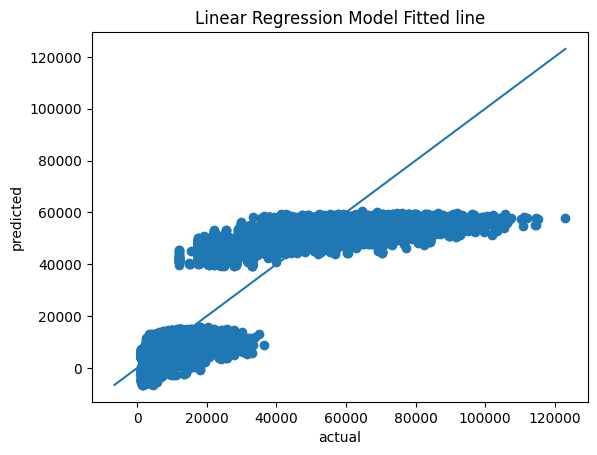

In [91]:
plt.scatter(y_test,y_pred)
plt.plot([p1,p2] ,[p1,p2])
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Linear Regression Model Fitted line')
plt.show()

In [99]:
difference=pd.DataFrame(np.c_[y_test,y_pred],columns=['Actual','Predicted'])

difference

,Actual,Predicted
0,7366.0,4561.507618
1,64831.0,52820.896162
2,6195.0,7879.351429
3,60160.0,56126.935926
4,6578.0,6666.193404
...,...,...
120057,5871.0,7439.258650
120058,6412.0,10919.041560
120059,69515.0,51772.553989
120060,15180.0,7968.025471


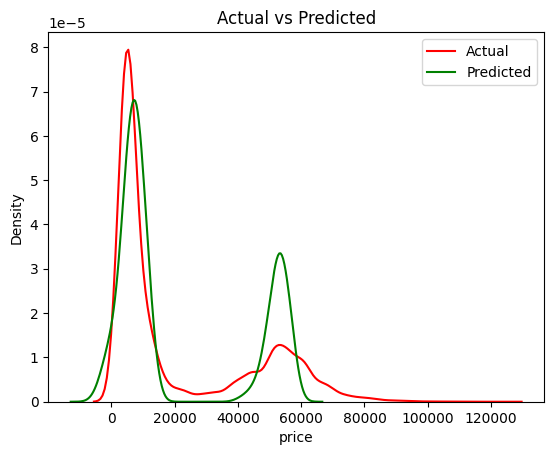

In [102]:
sns.kdeplot(y_test,color='red',label='Actual')
sns.kdeplot(y_pred,color='green',label='Predicted')
plt.legend()
plt.title('Actual vs Predicted')
plt.show()

# Misclassified data points

In [106]:
error=(y_test-y_pred).count()
print(f"Misclassified data points:{error}")

Misclassified data points:120062
